In [1]:
import pandas as pd

import re

import matplotlib.pyplot as plt

import os

In [2]:
directory = os.getcwd()
directory

'/home/bohdan/python_scripts/linguistics'

In [3]:
number_of_lines = []

directories = ['profilereader-main', 'unitychanspringbone', 'unityrenderstreaming', 'anotherthread-game', 'fpssample-game', 'unitycsreference', 'waveshooter-demo']

# directory_path = directory[7]

directory_path = 'unitycsreference'
for file in os.listdir(f'{directory}/source/{directory_path}'):
    filename, _ = os.path.splitext(file)

    with open(f'{directory}/source/{directory_path}/{file}') as f:
        lines = []
        line_counter = 0
        for line in f.readlines():
            if not line.strip().startswith('/'):
                line = re.sub(r'.*?\/(.*)$', '', line)
                line_counter += 1
                lines.append(line)

    lines = ' '.join(lines).replace('\n', ' \n ').replace(',', ' ').replace('@', '').replace(')', '').replace('}', '').replace(']', '')

    number_of_lines.append(line_counter)

    special_symbols = ['{', '(', ';', '[', '<', '>', '+', '=', '-', '/', '*', '^', '&', '!']

    # for symbol in special_symbols:
    #     lines = lines.replace(f'{symbol}', f' {symbol} ')

    # рядок про крапку
    lines = re.sub('\.\.', ' .. ', lines)
    lines = re.sub('(?<=[a-zA-Z_\?])\.(?=[a-zA-Z_\.])', ' . ', lines)
    lines = re.sub('{', '{ ', lines)
    lines = re.sub('\(', ' ( ', lines)
    lines = re.sub('\[', ' [ ', lines)

    # про < і не <=
    lines = re.sub('<[^=-]', ' < ', lines)

    # про > і не =>
    lines = re.sub('(?<=[^=])>', ' > ', lines)

    # = і не ==
    lines = re.sub('=[^=>]', '= ', lines)

    # ->
    lines = re.sub('-[^>]', '- ', lines)

    # + і не ++x чи x++
    lines = re.sub('\+\+', ' ++ ', lines)
    lines = re.sub('\+[^\+]', ' + ', lines)

    # -
    lines = re.sub('--', ' -- ', lines)
    lines = re.sub('-[^-]', ' - ', lines)

    # * \
    lines = re.sub('\*', ' * ', lines)
    lines = re.sub(r'\\', ' \ ', lines)

    # рядок про ? за винятком ?.
    lines = re.sub('\?[^\.]', ' ? ', lines)


    lines = re.sub(':', ' : ', lines)
    lines = re.sub(';', ' ; ', lines)
    lines = re.sub('"', ' " ', lines)

    # замінити кілька пробілів одним
    lines = re.sub('\s+', ' ', lines)
    # lines = re.sub(r'.*?\\(.*)\\n', '',lines)
    # lines = re.sub(r'@', '', lines)
    # lines
    # lines.replace('\n', ' \n').replace(';', ' ;'))

#     with open(f'{directory}/processed/{filename}.txt', 'w') as f:
#         f.write(lines)

    with open(f'{directory}/corpus/unity_code/{filename}.txt', 'w') as f:
        f.write(lines)

In [4]:
lines = pd.Series(number_of_lines).sort_values(ascending=False, ignore_index=True)

lines

0       4109
1       4109
2       4109
3       2560
4       1897
        ... 
1132       4
1133       3
1134       1
1135       0
1136       0
Length: 1137, dtype: int64

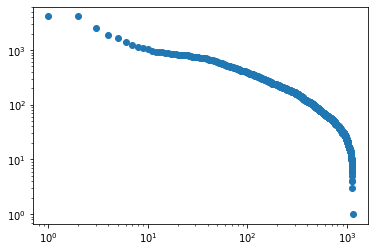

In [8]:
fig, ax = plt.subplots()

ax.set_xscale('log')
ax.set_yscale('log')
ax.scatter(lines.index, lines)

In [7]:
with open(f'{filename}.txt', 'w') as file:
    file.write(lines)

In [8]:
text = lines.split(' ')

print(len(text))

unique = {}
for word in text:
    if word in unique:
        unique[word] += 1
    else:
        unique[word] = 1



13042


In [9]:
unique = pd.DataFrame.from_dict(unique, orient='index').reset_index()#, columns=['word', 'freq'])\
unique = unique.rename(columns={"index": "word", 0: "freq"})
#unique.sort_valuse(by='0', ascending=False)

In [10]:
unique = unique.sort_values(by='freq', ascending=False).reset_index(drop=True)
unique

,word,freq
0,(,1274
1,;,989
2,{,684
3,self,663
4,[,553
...,...,...
955,GetUserProperty,1
956,numUserData,1
957,reference,1
958,visibility,1


In [11]:
unique.loc[unique['freq']==1]

,word,freq
592,world2local,1
593,Close,1
594,FloatArray,1
595,IntArray,1
596,GetNumScenes,1
...,...,...
955,GetUserProperty,1
956,numUserData,1
957,reference,1
958,visibility,1


In [12]:
len(unique.loc[unique['freq']==2])/len(unique.loc[unique['freq']==1])

0.9592391304347826

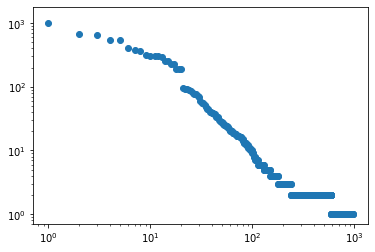

In [13]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(unique.index, unique['freq'])